# **Mounting the Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Installing the Framework**

In [ ]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.0/317.0 MB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.1-py2.py3-none-any.whl size=317488491 sha256=5d193818e1e08afcc122b5001bb610f087d197f4ec7bb6a191fdc1c7a4704406
  Stored in directory: /root/.cache/pip/wheels/80/1d/60/2c256ed38dddce2fdd93be545214a63e02fbd8d74fb0b7f3a6
Successfully built pyspark


# **Creating Spark Session**

In [ ]:
from pyspark import SparkContext
from pyspark.sql import SparkSession

spark = SparkSession \
  .builder \
  .master('local[*]') \
   .config("spark.executor.memory", "8g") \
    .config("spark.driver.memory", "8g") \
    .config("spark.sql.shuffle.partitions", "4") \
    .config("spark.sql.autoBroadcastJoinThreshold", "10485760") \
    .config("spark.sql.inMemoryColumnarStorage.batchSize", "10000") \
    .config("spark.sql.inMemoryColumnarStorage.compressed", "true") \
  .getOrCreate()
sc = spark.sparkContext



# **Changing Directory**

In [ ]:
%cd '/content/drive/MyDrive/Colab Notebooks/BigDataColab2024SpringKritiAjwani'

!ls

/content/drive/MyDrive/Colab Notebooks/BigDataColab2024SpringKritiAjwani
 ad-clicks.csv.gz	     'Midterm Section 2:Q1.ipynb'
 Alice_adventure_output_New  'Midterm Section 2: Q2.ipynb'
 Alice_adventure.txt	     'Midterm Section 2:Q3.ipynb'
 Alice_adv_output_New	      minute_weather.csv.gz
 Alice_output_New	      MR-DataJoin2KritiAjwani.ipynb
 BigDataTest1.ipynb	      MR-DataJoinKritiAjwani.ipynb
 BigDataTest2.ipynb	      MR-WordCountKritiAjwani.ipynb
 buy-clicks.csv.gz	      MT_Q1_make_data.py
 daily_weather.csv	      MT_Q2_make_data.py
 file			      MT_Q3_make_data.py
 game-clicks.csv.gz	      out0
 hadoop-3.3.6		      Out0
 hadoop-3.3.6.tar.gz	      outJoin2
 join1_FileA.txt	      outMIDTERMQ3
 join1_FileB.txt	      output
 join2_genchanA.txt	      outputDataJoin
 join2_genchanB.txt	      outputFileJoin
 join2_genchanC.txt	      outputJoinData
 join2_gennumA.txt	      outputMidtermQ1
 join2_gennumB.txt	      outputMIDTERMQ2
 join2_gennumC.txt	      output_New
 join2_mapper.py	      ou

# **Import SparkSession**

In [ ]:

from pyspark.sql import SparkSession
from pyspark.sql import SQLContext
from pyspark.sql.functions import *
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
import matplotlib.pyplot as plt
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml.linalg import Vectors
from pyspark.ml import Pipeline
from pyspark.sql.functions import col
from pyspark.sql.types import FloatType, IntegerType
from pyspark.sql.functions import to_unix_timestamp
from pyspark.sql.functions import to_timestamp, col

# **Creating Data frame**

In [ ]:
sqlContext = SQLContext(sc)

taxi_df = sqlContext.read.load('/content/drive/MyDrive/smaller_file1.csv',
                      format='com.databricks.spark.csv',
                      header='true' ,
                      inferSchema='true')
taxi_df.columns

/usr/local/lib/python3.10/dist-packages/pyspark/sql/context.py:113: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'pickup_longitude',
 'pickup_latitude',
 'RateCodeID',
 'store_and_fwd_flag',
 'dropoff_longitude',
 'dropoff_latitude',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount']

# **Data Frame with the Statistical Analysis**

In [ ]:
taxi_df.show()

+--------+--------------------+---------------------+---------------+-------------+------------------+------------------+----------+------------------+------------------+------------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|  pickup_longitude|   pickup_latitude|RateCodeID|store_and_fwd_flag| dropoff_longitude|  dropoff_latitude|payment_type|fare_amount|extra|mta_tax|tip_amount|tolls_amount|improvement_surcharge|total_amount|
+--------+--------------------+---------------------+---------------+-------------+------------------+------------------+----------+------------------+------------------+------------------+------------+-----------+-----+-------+----------+------------+---------------------+------------+
|       2| 2015-01-15 19:05:39|  2015-01-15 19:23:42|              1|         1.59|  -73.993896484375|  40.7501106262207|         1|    

In [ ]:
taxi_df.describe()

DataFrame[summary: string, VendorID: string, passenger_count: string, trip_distance: string, pickup_longitude: string, pickup_latitude: string, RateCodeID: string, store_and_fwd_flag: string, dropoff_longitude: string, dropoff_latitude: string, payment_type: string, fare_amount: string, extra: string, mta_tax: string, tip_amount: string, tolls_amount: string, improvement_surcharge: string, total_amount: string]

In [ ]:
taxi_df.describe().toPandas().transpose()


,0,1,2,3,4
summary,count,mean,stddev,min,max
VendorID,6374493,1.520808635290681,0.4995668522312344,1,2
passenger_count,6374493,1.6803082221597858,1.3365757398900375,0,9
trip_distance,6374493,12.465398322658686,10102.286603571058,0.0,1.54200045E7
pickup_longitude,6374493,-72.5591420268111,10.134784608024036,-121.92581176757812,78.66265106201173
pickup_latitude,6374493,39.97126435536934,5.583039332493033,0.0,56.95229721069336
RateCodeID,6374493,1.0365191396398115,0.6463857796398295,1,99
store_and_fwd_flag,6374493,None,None,N,Y
dropoff_longitude,6374493,-72.60740503308249,9.970167465794418,-736.4166870117188,85.27402496337889
dropoff_latitude,6374493,39.998744646799516,5.490473248559875,-9.029156684875488,404.8333435058594


# **Pre-Processing the Data**

In [ ]:
# 1. Remove rows with missing values
taxi_df = taxi_df.dropna()

# 2. Remove duplicates
taxi_df = taxi_df.dropDuplicates()

# 3. Remove outliers (if needed)
# For example, filter records based on reasonable ranges for trip distance, fare amount, etc.
taxi_df = taxi_df.filter((col("trip_distance") > 0) & (col("trip_distance") < 100))

# 4. Convert data types (if needed)
# For example, convert string columns to appropriate data types
taxi_df = taxi_df.withColumn("tpep_pickup_datetime", col("tpep_pickup_datetime").cast("timestamp"))
taxi_df = taxi_df.withColumn("tpep_dropoff_datetime", col("tpep_dropoff_datetime").cast("timestamp"))

# 5. Remove irrelevant columns (if needed)
# For example, drop columns that are not relevant for analysis
columns_to_drop = ["extra", "mta_tax", "tolls_amount", "improvement_surcharge", "payment_type", "RateCodeID", "store_and_fwd_flag"]
taxi_df_cleaned = taxi_df.drop(*columns_to_drop)


assembler = VectorAssembler(inputCols=["trip_distance"], outputCol="features")
scaler = MinMaxScaler(inputCol="features", outputCol="scaled_trip_distance")
pipeline = Pipeline(stages=[assembler, scaler])
taxi_df_cleaned = pipeline.fit(taxi_df_cleaned).transform(taxi_df_cleaned)

# Show cleaned DataFrame
taxi_df_cleaned.select("scaled_trip_distance").show(5)




+--------------------+
|scaled_trip_distance|
+--------------------+
|[0.01581739913905...|
|[0.18210031034137...|
|[0.00890980078085...|
|[0.03093402743017...|
|[0.02362598858744...|
+--------------------+
only showing top 5 rows



In [ ]:
taxi_df_cleaned.show(25)

+--------+--------------------+---------------------+---------------+-------------+------------------+------------------+------------------+------------------+-----------+----------+------------+--------+--------------------+
|VendorID|tpep_pickup_datetime|tpep_dropoff_datetime|passenger_count|trip_distance|  pickup_longitude|   pickup_latitude| dropoff_longitude|  dropoff_latitude|fare_amount|tip_amount|total_amount|features|scaled_trip_distance|
+--------+--------------------+---------------------+---------------+-------------+------------------+------------------+------------------+------------------+-----------+----------+------------+--------+--------------------+
|       2| 2015-01-15 19:05:39|  2015-01-15 19:23:42|              1|         1.59|  -73.993896484375|  40.7501106262207|-73.97478485107422| 40.75061798095703|       12.0|      3.25|       17.05|  [1.59]|[0.01581739913905...|
|       1| 2015-01-10 20:33:39|  2015-01-10 21:11:35|              3|         18.2|-73.783042907

In [ ]:
taxi_df_cleaned.describe()

DataFrame[summary: string, VendorID: string, passenger_count: string, trip_distance: string, pickup_longitude: string, pickup_latitude: string, dropoff_longitude: string, dropoff_latitude: string, fare_amount: string, tip_amount: string, total_amount: string]

In [ ]:
from pyspark.sql.functions import to_timestamp, col

taxi_df_cleaned = taxi_df_cleaned.withColumn("tpep_pickup_datetime", to_timestamp(col("tpep_pickup_datetime")))
taxi_df_cleaned = taxi_df_cleaned.withColumn("tpep_dropoff_datetime", to_timestamp(col("tpep_dropoff_datetime")))


In [ ]:
from pyspark.sql.functions import to_unix_timestamp

taxi_df_cleaned = taxi_df_cleaned.withColumn("trip_duration", to_unix_timestamp("tpep_dropoff_datetime") - to_unix_timestamp("tpep_pickup_datetime"))

In [ ]:
taxi_df_cleaned = taxi_df_cleaned.withColumn("VendorID", taxi_df_cleaned["VendorID"].cast(IntegerType()))
taxi_df_cleaned = taxi_df_cleaned.withColumn("passenger_count", taxi_df_cleaned["passenger_count"].cast(IntegerType()))
taxi_df_cleaned = taxi_df_cleaned.withColumn("trip_distance", taxi_df_cleaned["trip_distance"].cast(FloatType()))
taxi_df_cleaned = taxi_df_cleaned.withColumn("pickup_longitude", taxi_df_cleaned["pickup_longitude"].cast(FloatType()))
taxi_df_cleaned = taxi_df_cleaned.withColumn("pickup_latitude", taxi_df_cleaned["pickup_latitude"].cast(FloatType()))
taxi_df_cleaned = taxi_df_cleaned.withColumn("dropoff_longitude", taxi_df_cleaned["dropoff_longitude"].cast(FloatType()))
taxi_df_cleaned = taxi_df_cleaned.withColumn("dropoff_latitude", taxi_df_cleaned["dropoff_latitude"].cast(FloatType()))
taxi_df_cleaned = taxi_df_cleaned.withColumn("fare_amount", taxi_df_cleaned["fare_amount"].cast(FloatType()))
taxi_df_cleaned = taxi_df_cleaned.withColumn("tip_amount", taxi_df_cleaned["tip_amount"].cast(FloatType()))
taxi_df_cleaned = taxi_df_cleaned.withColumn("total_amount", taxi_df_cleaned["total_amount"].cast(FloatType()))
taxi_df_cleaned = taxi_df_cleaned.withColumn("trip_duration", taxi_df_cleaned["trip_duration"].cast(IntegerType()))

# Show the DataFrame with converted data types
taxi_df_cleaned.printSchema()



root
 |-- VendorID: integer (nullable = true)
 |-- tpep_pickup_datetime: timestamp (nullable = true)
 |-- tpep_dropoff_datetime: timestamp (nullable = true)
 |-- passenger_count: integer (nullable = true)
 |-- trip_distance: float (nullable = true)
 |-- pickup_longitude: float (nullable = true)
 |-- pickup_latitude: float (nullable = true)
 |-- dropoff_longitude: float (nullable = true)
 |-- dropoff_latitude: float (nullable = true)
 |-- fare_amount: float (nullable = true)
 |-- tip_amount: float (nullable = true)
 |-- total_amount: float (nullable = true)
 |-- features: vector (nullable = true)
 |-- scaled_trip_distance: vector (nullable = true)
 |-- trip_duration: integer (nullable = true)



# **Correlation Matrix**

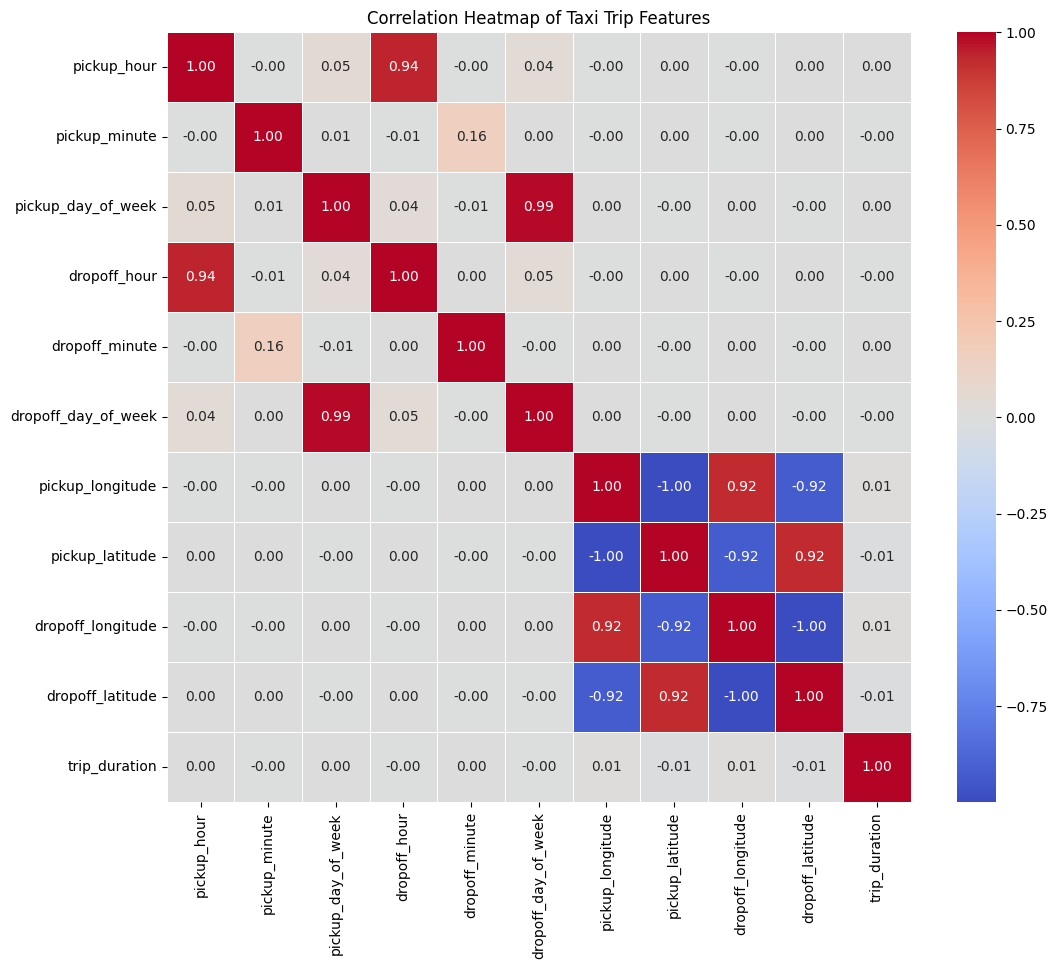

In [ ]:
import seaborn as sns
# Extract relevant components for pickup time
taxi_df_cleaned = taxi_df_cleaned.withColumn("pickup_hour", hour("tpep_pickup_datetime")) \
    .withColumn("pickup_minute", minute("tpep_pickup_datetime")) \
    .withColumn("pickup_day_of_week", dayofweek("tpep_pickup_datetime"))

# Extract relevant components for drop-off time
taxi_df_cleaned = taxi_df_cleaned.withColumn("dropoff_hour", hour("tpep_dropoff_datetime")) \
    .withColumn("dropoff_minute", minute("tpep_dropoff_datetime")) \
    .withColumn("dropoff_day_of_week", dayofweek("tpep_dropoff_datetime"))

# Compute trip duration
taxi_df_cleaned = taxi_df_cleaned.withColumn("trip_duration", (col("tpep_dropoff_datetime").cast("long") - col("tpep_pickup_datetime").cast("long")))

# Select relevant numeric features for correlation analysis
numeric_features = ['pickup_hour', 'pickup_minute', 'pickup_day_of_week',
                    'dropoff_hour', 'dropoff_minute', 'dropoff_day_of_week',
                    'pickup_longitude', 'pickup_latitude',
                    'dropoff_longitude', 'dropoff_latitude',
                    'trip_duration']

# Compute correlation matrix
correlation_matrix = taxi_df_cleaned.select(numeric_features).toPandas().corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Taxi Trip Features')
plt.show()

# **Plotting Relevant Features**

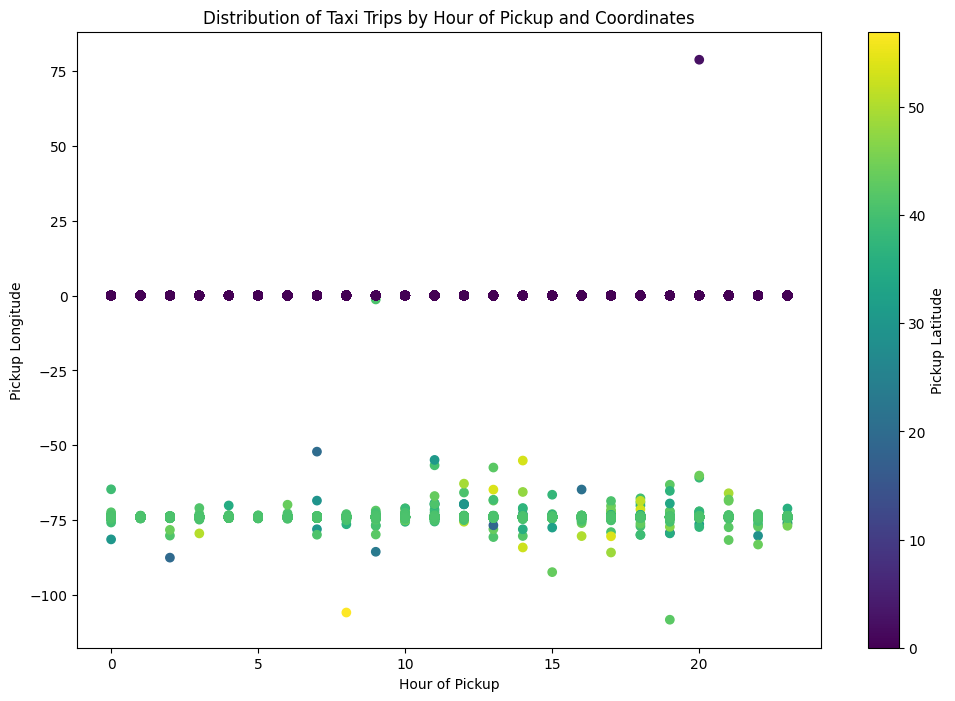

In [ ]:
from pyspark.sql.functions import hour

# Extract hour from pickup time
plot_df = taxi_df_cleaned.withColumn('pickup_hour', hour('tpep_pickup_datetime')).select('pickup_hour', 'pickup_longitude', 'pickup_latitude').toPandas()

# Plotting
plt.figure(figsize=(12, 8))
plt.scatter(plot_df['pickup_hour'], plot_df['pickup_longitude'], c=plot_df['pickup_latitude'], cmap='viridis', marker='o')
plt.xlabel('Hour of Pickup')
plt.ylabel('Pickup Longitude')
plt.title('Distribution of Taxi Trips by Hour of Pickup and Coordinates')
plt.colorbar(label='Pickup Latitude')
plt.show()

# **K-means Cluster**

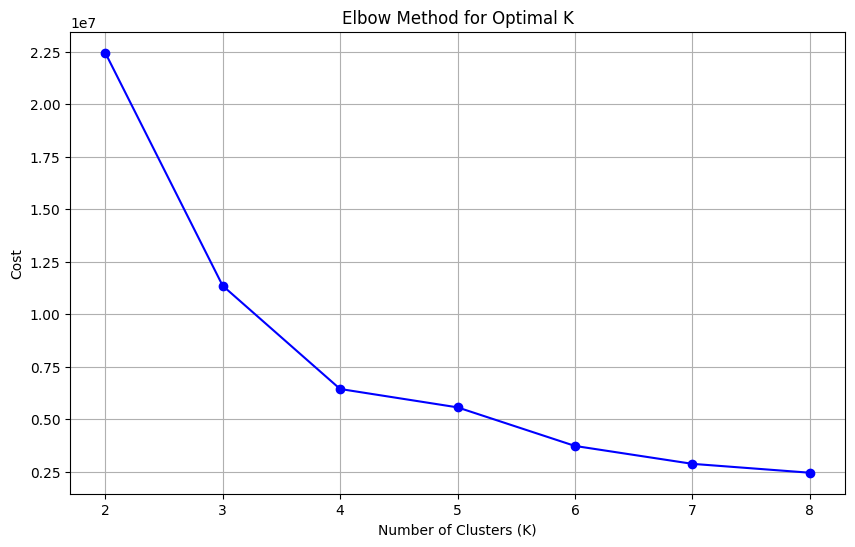

In [ ]:

from pyspark.ml.feature import VectorAssembler
from pyspark.ml.clustering import KMeans


# Extract relevant components for pickup time
taxi_df_cleaned = taxi_df_cleaned.withColumn("pickup_hour", hour("tpep_pickup_datetime")) \
    .withColumn("pickup_minute", minute("tpep_pickup_datetime")) \
    .withColumn("pickup_day_of_week", dayofweek("tpep_pickup_datetime"))

# Select relevant features for clustering
feature_cols = ['pickup_hour', 'pickup_latitude']
assembler = VectorAssembler(inputCols=feature_cols, outputCol="New_features")
feature_vector = assembler.transform(taxi_df_cleaned)

# Set up K-means model
k_values = range(2, 9)
costs = []

for k in k_values:
    kmeans = KMeans(featuresCol="features", k=k)
    model = kmeans.fit(feature_vector)
    costs.append(model.summary.trainingCost)

# Plotting the Elbow Method to find optimal K
plt.figure(figsize=(10, 6))
plt.plot(k_values, costs, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Cost')
plt.xticks(k_values)
plt.grid(True)
plt.show()

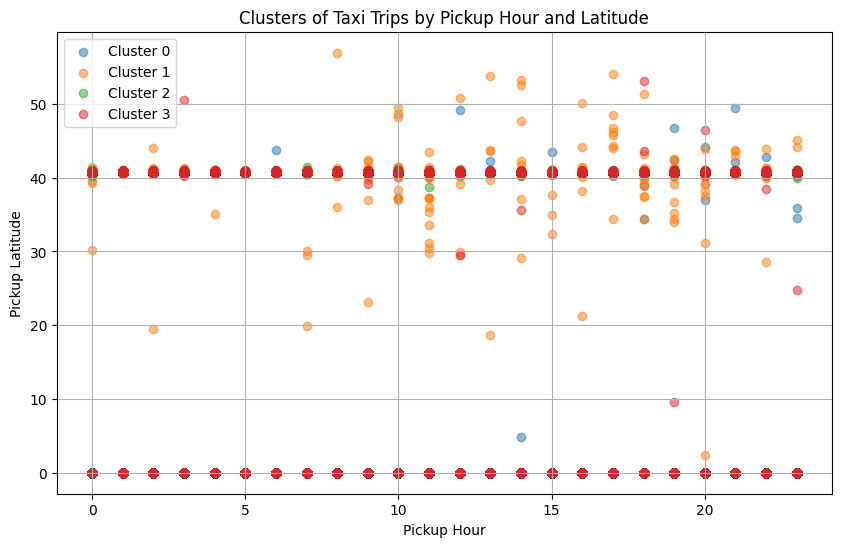

In [ ]:
k = 4 # Optimal K value based on Elbow Method or your choice
kmeans = KMeans(featuresCol="features", k=k)
model = kmeans.fit(feature_vector)

# Assign each data point to a cluster
predictions = model.transform(feature_vector)

# Convert Spark DataFrame to Pandas DataFrame for plotting
predictions_df = predictions.select("pickup_hour", "pickup_latitude", "prediction").toPandas()

# Plotting clusters
plt.figure(figsize=(10, 6))
for cluster in range(k):
    cluster_data = predictions_df[predictions_df['prediction'] == cluster]
    plt.scatter(cluster_data['pickup_hour'], cluster_data['pickup_latitude'], label=f'Cluster {cluster}', alpha=0.5)

plt.xlabel('Pickup Hour')
plt.ylabel('Pickup Latitude')
plt.title('Clusters of Taxi Trips by Pickup Hour and Latitude')
plt.legend()
plt.grid(True)
plt.show()

# **Regression model**

In [ ]:
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

# Select relevant features for regression
feature_cols = ['trip_distance']  # Add more features as needed
assembler = VectorAssembler(inputCols=feature_cols, outputCol="Reg_features")
feature_vector = assembler.transform(taxi_df_cleaned)

# Split the dataset into training and testing sets
(train_data, test_data) = feature_vector.randomSplit([0.8, 0.2], seed=42)



# Set up Linear Regression model
lr = LinearRegression(featuresCol="features", labelCol="fare_amount")

# Train the model
lr_model = lr.fit(train_data)

# Make predictions on test data
predictions = lr_model.transform(test_data)

# Evaluate the model
evaluator = RegressionEvaluator(labelCol="fare_amount", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print(f"Root Mean Squared Error (RMSE): {rmse}")


Root Mean Squared Error (RMSE): 3.2376014077532624


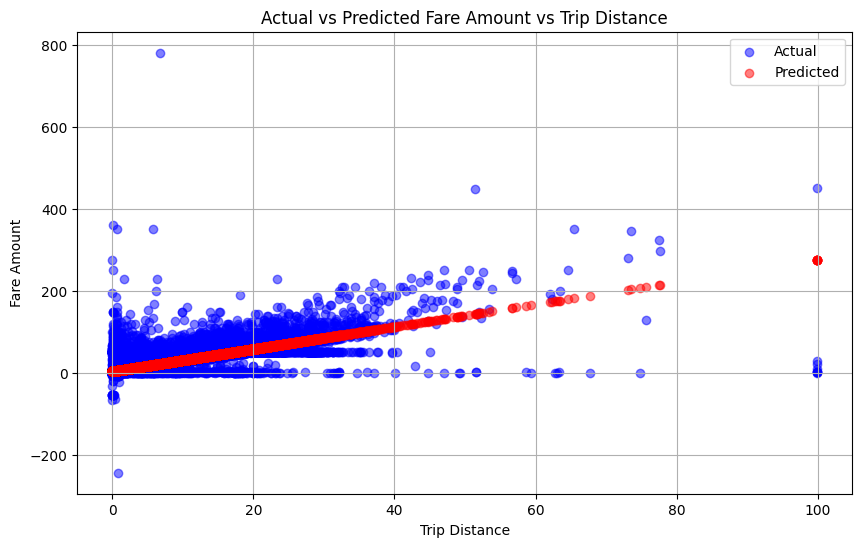

In [ ]:
import matplotlib.pyplot as plt

actual_fare_amount = predictions.select("fare_amount").collect()
predicted_fare_amount = predictions.select("prediction").collect()
trip_distance = predictions.select("trip_distance").collect()

# Plotting actual versus predicted fare amount against trip distance
plt.figure(figsize=(10, 6))
plt.scatter(trip_distance, actual_fare_amount, color='blue', label='Actual', alpha=0.5)
plt.scatter(trip_distance, predicted_fare_amount, color='red', label='Predicted', alpha=0.5)
plt.xlabel('Trip Distance')
plt.ylabel('Fare Amount')
plt.title('Actual vs Predicted Fare Amount vs Trip Distance')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import hour
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression



# Extracting hour from the pickup datetime
taxi_df_cleaned = taxi_df_cleaned.withColumn("pickup_hour", hour("tpep_pickup_datetime"))

# Selecting relevant columns
taxi_df_cleaned = taxi_df_cleaned.select("pickup_hour", "tip_amount")

# Creating a feature vector by combining the features using VectorAssembler
assembler = VectorAssembler(inputCols=["pickup_hour"], outputCol="features")
taxi_df_cleaned = assembler.transform(taxi_df_cleaned)

# Splitting the data into training and testing sets
train_data, test_data = taxi_df_cleaned.randomSplit([0.8, 0.2], seed=1234)

# Creating a Linear Regression model
lr = LinearRegression(featuresCol="features", labelCol="tip_amount")

# Training the model
lr_model = lr.fit(train_data)

# Making predictions on the test data
predictions = lr_model.transform(test_data)

# Displaying predictions
predictions.select("pickup_hour", "tip_amount", "prediction").show()

# Evaluating the model
evaluator = RegressionEvaluator(labelCol="tip_amount", predictionCol="prediction", metricName="rmse")
rmse = evaluator.evaluate(predictions)
print("Root Mean Squared Error (RMSE) on test data = %g" % rmse)

+-----------+----------+------------------+
|pickup_hour|tip_amount|        prediction|
+-----------+----------+------------------+
|          0|       0.0|1.4947732865390373|
|          0|       0.0|1.4947732865390373|
|          0|       0.0|1.4947732865390373|
|          0|       0.0|1.4947732865390373|
|          0|       0.0|1.4947732865390373|
|          0|       0.0|1.4947732865390373|
|          0|       0.0|1.4947732865390373|
|          0|       0.0|1.4947732865390373|
|          0|       0.0|1.4947732865390373|
|          0|       0.0|1.4947732865390373|
|          0|       0.0|1.4947732865390373|
|          0|       0.0|1.4947732865390373|
|          0|       0.0|1.4947732865390373|
|          0|       0.0|1.4947732865390373|
|          0|       0.0|1.4947732865390373|
|          0|       0.0|1.4947732865390373|
|          0|       0.0|1.4947732865390373|
|          0|       0.0|1.4947732865390373|
|          0|       0.0|1.4947732865390373|
|          0|       0.0|1.494773

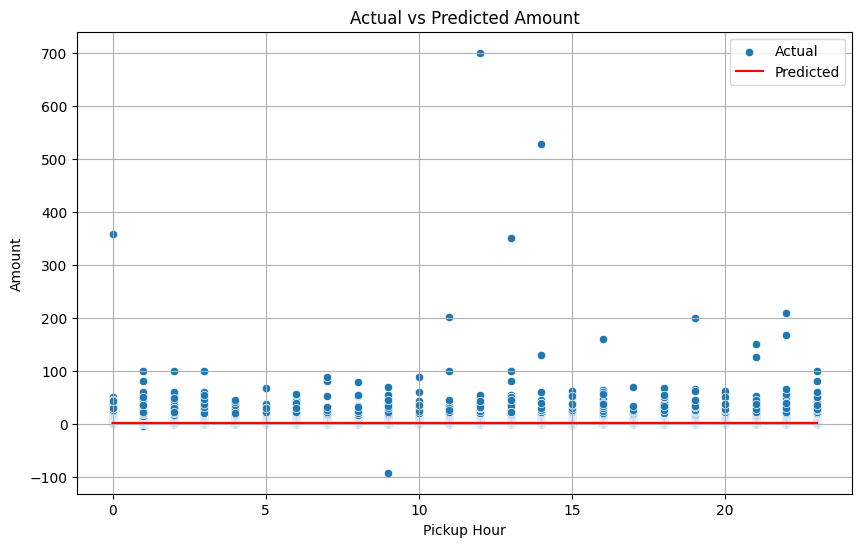

In [ ]:
predictions_df = predictions.toPandas()
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pickup_hour', y='tip_amount', data=predictions_df, label='Actual')
sns.lineplot(x='pickup_hour', y='prediction', data=predictions_df, color='red', label='Predicted')
plt.xlabel('Pickup Hour')
plt.ylabel('Amount')
plt.title('Actual vs Predicted Amount')
plt.legend()
plt.grid(True)
plt.show()